In [1]:
#importing the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#reading the dataset
data = pd.read_csv("LoanApprovalPrediction.csv") 

In [2]:
#dropping load id column as it is completely unique and not co related to any other column
data.drop(['Loan_ID'],axis=1,inplace=True)

In [3]:
#getting the columns with categorical values
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
print(object_cols)

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


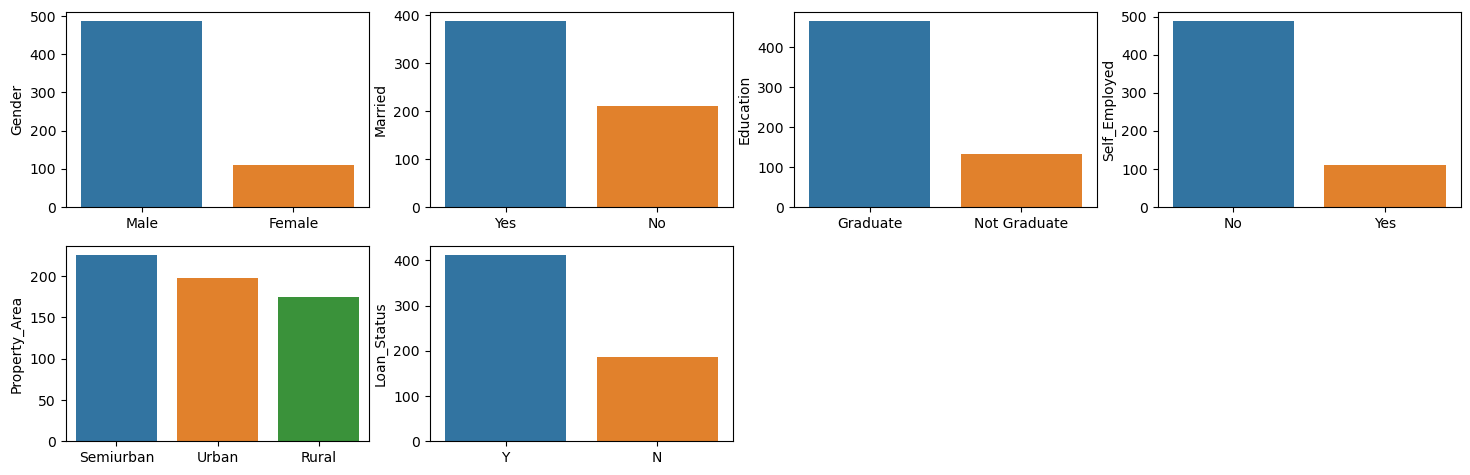

In [4]:
#drawing the barplot of different variables
plt.figure(figsize=(18,36)) 
index = 1
for col in object_cols: 
  y = data[col].value_counts() 
  plt.subplot(12,4,index) 
  sns.barplot(x=list(y.index), y=y) 
  index +=1

In [5]:
print(object_cols)

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [6]:
# Importing label encoder to change categoricasl variables into int type
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
for col in object_cols: 
    data[col] = label_encoder.fit_transform(data[col])

<Axes: >

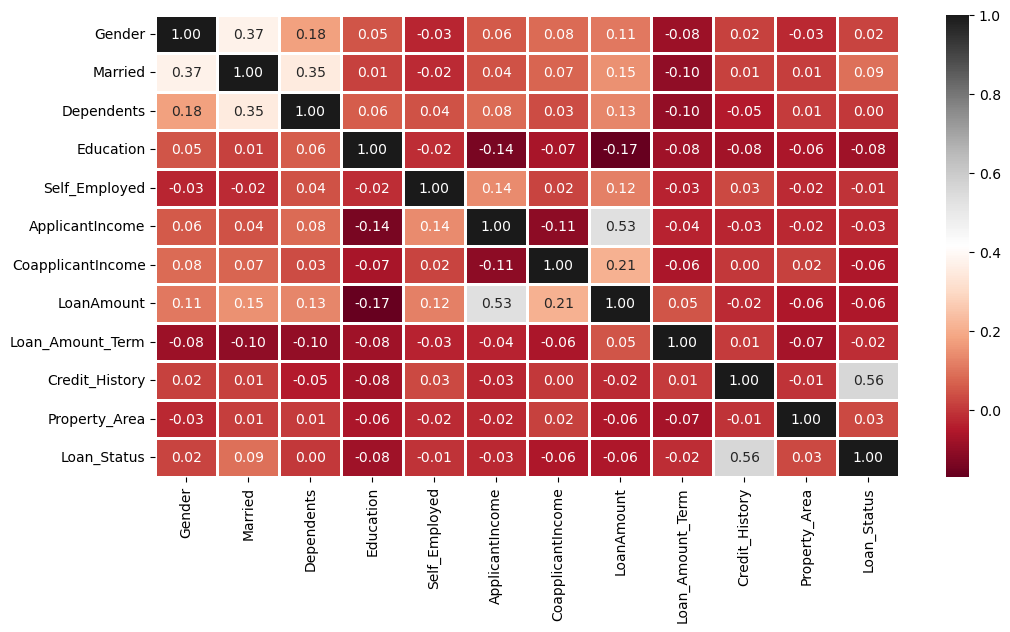

In [7]:
#drawing a heatmap to find a correlation
#using 'RdGy' color scheme could use magma or viridis anything
plt.figure(figsize=(12,6)) 
sns.heatmap(data.corr(),cmap='RdGy',fmt='.2f',linewidths=1,annot=True)

In [8]:
#there is a correlation between applicant income and loan amount
#aslo credit history has a direct impact on loan status

In [9]:
#checking the number of missing values
data.isna().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#filling the missing values with the mean of the column
for col in data.columns: 
    data[col] = data[col].fillna(data[col].mean()) 
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
#dropping the target column 
X = data.drop(['Loan_Status'],axis=1) 
Y = data['Loan_Status'] 

In [12]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((358, 11), (240, 11), (358,), (240,))

In [13]:
#using KNN, Random Forest, SVC, Logistic Regression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 

from sklearn import metrics 

knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state =7) 
svc = SVC() 
lc = LogisticRegression() 

# making predictions on the training set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_train) 
    print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(Y_train, Y_pred))

Accuracy score of  RandomForestClassifier = 98.04469273743017
Accuracy score of  KNeighborsClassifier = 78.49162011173185
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 80.44692737430168


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# making predictions on the testing set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_test) 
    print("Accuracy score of ", clf.__class__.__name__,"=", 100*metrics.accuracy_score(Y_test, Y_pred))

Accuracy score of  RandomForestClassifier = 82.5
Accuracy score of  KNeighborsClassifier = 63.74999999999999
Accuracy score of  SVC = 69.16666666666667
Accuracy score of  LogisticRegression = 80.83333333333333


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
##Random Forest Classifier was the most accurate in this Loan Approval Predictor.